In [1]:
import pandas as pd

In [2]:
path1 = 'C:/Users/asim.tewari/Downloads/all_face_features_first_part.csv'
path2 = 'C:/Users/asim.tewari/Downloads/all_face_features_second_part.csv'

In [2]:
df = pd.read_hdf('D:/holistic_features_deception/data_with_gender.h5',  'data')

In [64]:
import shap

In [65]:
import xgboost

In [3]:
df.drop(['frame','face_id','success'],axis=1,inplace=True)

In [100]:
df.person_id.unique()

array([ 3,  2,  1,  5,  9,  4,  8,  7,  6, 10, 13, 15, 14, 11, 12, 17, 16,
       24, 23, 19, 21, 20, 22, 18, 25, 30, 31, 28], dtype=uint8)

In [4]:
# df2 = pd.read_csv('C:/Users/asim.tewari/Downloads/liwc_final (1).csv')

In [3]:
df2 = pd.read_csv('C:/Users/asim.tewari/Documents/Divya/liwc_final_question_type.csv')

In [97]:
df3 = pd.read_csv('C:/Users/asim.tewari/Downloads/personality_y.csv')

In [109]:
new_df  = pd.merge(df,df3,how='outer',left_on='person_id',right_on='person_id')
df.shape,new_df.shape
new_df =  new_df[new_df.columns[list(range(720))]]

((862394, 718), (862397, 915))

In [113]:
new_df.to_hdf('data_with_gender.h5','data')

In [111]:
new_df.columns

Index(['timestamp', 'confidence', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
       'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y',
       ...
       'AU45_c', 'question', 'person_id', 'WC', 'OtherP', 'y',
       'positive_assumption', 'negative_assumption',
       'What is your age (in years) ?', 'Gender_Male'],
      dtype='object', length=720)

In [5]:
df= df[df['question']!= 'D_1']
df= df[df['question']!= 'D_2']
df= df[df['question']!= '17']

In [6]:
df2= df2[df2['question']!= 'D_1']
df2= df2[df2['question']!= 'D_2']

In [7]:
def rem2(a):
  return int(a[2:])

df.person_id = df.person_id.apply(rem2)

In [6]:
df2['question']=df2['question'].astype('object')
df['question']=df['question'].astype('object')

In [10]:
df2['person_id']=df2['person_id'].astype('int64')
df['person_id']=df['person_id'].astype('int64')
# df['question']=df['question'].astype('object')

In [18]:
new_df = pd.merge(df, df2,  how='left', on=['question'])

In [19]:
new_df

,timestamp,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,QMark,Dash,Apostro,OtherP_y,y_y,positive_assumption_y,negative_assumption_y,outcome_question,recollection_question,hypothetical_question
0,0.000000,0.98,0.185971,0.026995,-0.982184,0.016490,0.019267,-0.999678,0.102,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.040000,0.98,0.190378,0.012213,-0.981635,0.024257,0.007185,-0.999680,0.108,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.080000,0.88,0.212382,0.012924,-0.977101,0.039160,0.010338,-0.999179,0.127,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.120000,0.88,0.218220,0.003574,-0.975893,0.052378,0.003352,-0.998622,0.136,0.004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.160000,0.88,0.214218,0.000620,-0.976786,0.051788,-0.000215,-0.998658,0.134,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862389,24.120001,0.93,0.182199,0.041695,-0.982377,0.013480,0.048987,-0.998708,0.098,0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862390,24.160000,0.93,0.177718,0.041968,-0.983186,0.009446,0.048484,-0.998779,0.094,0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862391,24.200001,0.98,0.177143,0.040887,-0.983335,0.008951,0.047248,-0.998843,0.094,0.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862392,24.240000,0.98,0.177304,0.040394,-0.983327,0.008961,0.046785,-0.998865,0.094,0.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_df.isna().sum().sum()

MemoryError: Unable to allocate 73.2 MiB for an array with shape (89, 862394) and data type bool

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")

In [125]:
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            print("min for this col: ",mn)
            print("max for this col: ",mx)
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

In [126]:
X_train,NAlist=reduce_mem_usage(X_train)
X_test,NAlist=reduce_mem_usage(X_test)

Memory usage of properties dataframe is : 2187.6749572753906  MB
******************************
Column:  timestamp
dtype before:  float32
min for this col:  0.0
max for this col:  250.04200744628906
dtype after:  float32
******************************
******************************
Column:  confidence
dtype before:  float32
min for this col:  0.0
max for this col:  0.9800000190734863
dtype after:  float32
******************************
******************************
Column:  gaze_0_x
dtype before:  float32
min for this col:  -0.7704650163650513
max for this col:  0.6624360084533691
dtype after:  float32
******************************
******************************
Column:  gaze_0_y
dtype before:  float32
min for this col:  -0.6232360005378723
max for this col:  0.6095899939537048
dtype after:  float32
******************************
******************************
Column:  gaze_0_z
dtype before:  float32
min for this col:  -1.0
max for this col:  0.0
dtype after:  float32
***************

min for this col:  126.19999694824219
max for this col:  539.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_37
dtype before:  float32
min for this col:  127.5999984741211
max for this col:  542.4000244140625
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_38
dtype before:  float32
min for this col:  129.6999969482422
max for this col:  545.7999877929688
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_39
dtype before:  float32
min for this col:  132.60000610351562
max for this col:  549.2999877929688
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_40
dtype before:  float32
min for this col:  135.39999389648438
max for this col:  553.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_41
dtype before:  float32
min fo

min for this col:  -46.29999923706055
max for this col:  326.1000061035156
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_28
dtype before:  float32
min for this col:  -47.29999923706055
max for this col:  329.8999938964844
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_29
dtype before:  float32
min for this col:  -50.099998474121094
max for this col:  325.79998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_30
dtype before:  float32
min for this col:  -52.20000076293945
max for this col:  324.70001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_31
dtype before:  float32
min for this col:  -52.400001525878906
max for this col:  327.20001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_3

dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_16
dtype before:  float32
min for this col:  -536.4000244140625
max for this col:  433.8999938964844
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_17
dtype before:  float32
min for this col:  -540.5999755859375
max for this col:  429.79998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_18
dtype before:  float32
min for this col:  -545.0999755859375
max for this col:  426.79998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_19
dtype before:  float32
min for this col:  -549.2999877929688
max for this col:  424.79998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_20
dtype before:  float32
min for this col:  -542.0999755859375
max for this c

min for this col:  -433.6000061035156
max for this col:  504.70001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_6
dtype before:  float32
min for this col:  -434.6000061035156
max for this col:  506.6000061035156
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_7
dtype before:  float32
min for this col:  -438.29998779296875
max for this col:  505.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_8
dtype before:  float32
min for this col:  -443.20001220703125
max for this col:  506.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_9
dtype before:  float32
min for this col:  -444.5
max for this col:  502.79998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_10
dtype before:  float32
min for this col

min for this col:  -420.5
max for this col:  486.1000061035156
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_51
dtype before:  float32
min for this col:  -422.3999938964844
max for this col:  484.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_52
dtype before:  float32
min for this col:  -424.3999938964844
max for this col:  482.6000061035156
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_53
dtype before:  float32
min for this col:  -425.29998779296875
max for this col:  481.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_54
dtype before:  float32
min for this col:  -424.6000061035156
max for this col:  481.8999938964844
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_55
dtype before:  float32
min for this co

min for this col:  148.8000030517578
max for this col:  1969.199951171875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_43
dtype before:  float32
min for this col:  145.6999969482422
max for this col:  1965.9000244140625
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_44
dtype before:  float32
min for this col:  142.0
max for this col:  1963.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_45
dtype before:  float32
min for this col:  139.1999969482422
max for this col:  1961.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_46
dtype before:  float32
min for this col:  137.60000610351562
max for this col:  1960.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_47
dtype before:  float32
min for this col:  136.69999

min for this col:  146.0
max for this col:  569.5
dtype after:  float32
******************************
******************************
Column:  x_27
dtype before:  float32
min for this col:  106.9000015258789
max for this col:  541.9000244140625
dtype after:  float32
******************************
******************************
Column:  x_28
dtype before:  float32
min for this col:  102.69999694824219
max for this col:  546.0999755859375
dtype after:  float32
******************************
******************************
Column:  x_29
dtype before:  float32
min for this col:  95.69999694824219
max for this col:  550.5
dtype after:  float32
******************************
******************************
Column:  x_30
dtype before:  float32
min for this col:  83.5
max for this col:  555.0
dtype after:  float32
******************************
******************************
Column:  x_31
dtype before:  float32
min for this col:  77.19999694824219
max for this col:  529.7999877929688
dtype after

dtype after:  float32
******************************
******************************
Column:  y_7
dtype before:  float32
min for this col:  44.400001525878906
max for this col:  465.70001220703125
dtype after:  float32
******************************
******************************
Column:  y_8
dtype before:  float32
min for this col:  45.099998474121094
max for this col:  473.8999938964844
dtype after:  float32
******************************
******************************
Column:  y_9
dtype before:  float32
min for this col:  43.70000076293945
max for this col:  474.5
dtype after:  float32
******************************
******************************
Column:  y_10
dtype before:  float32
min for this col:  39.099998474121094
max for this col:  464.79998779296875
dtype after:  float32
******************************
******************************
Column:  y_11
dtype before:  float32
min for this col:  31.299999237060547
max for this col:  450.79998779296875
dtype after:  float32
***********

min for this col:  -2.5999999046325684
max for this col:  407.8999938964844
dtype after:  float32
******************************
******************************
Column:  y_54
dtype before:  float32
min for this col:  3.299999952316284
max for this col:  419.0
dtype after:  float32
******************************
******************************
Column:  y_55
dtype before:  float32
min for this col:  11.699999809265137
max for this col:  424.70001220703125
dtype after:  float32
******************************
******************************
Column:  y_56
dtype before:  float32
min for this col:  15.899999618530273
max for this col:  425.3999938964844
dtype after:  float32
******************************
******************************
Column:  y_57
dtype before:  float32
min for this col:  18.299999237060547
max for this col:  424.0
dtype after:  float32
******************************
******************************
Column:  y_58
dtype before:  float32
min for this col:  18.799999237060547
max f

min for this col:  -613.2000122070312
max for this col:  524.5
dtype after:  float32
******************************
******************************
Column:  X_33
dtype before:  float32
min for this col:  -604.7000122070312
max for this col:  530.4000244140625
dtype after:  float32
******************************
******************************
Column:  X_34
dtype before:  float32
min for this col:  -597.7999877929688
max for this col:  539.0999755859375
dtype after:  float32
******************************
******************************
Column:  X_35
dtype before:  float32
min for this col:  -591.7999877929688
max for this col:  547.4000244140625
dtype after:  float32
******************************
******************************
Column:  X_36
dtype before:  float32
min for this col:  -663.7000122070312
max for this col:  509.20001220703125
dtype after:  float32
******************************
******************************
Column:  X_37
dtype before:  float32
min for this col:  -655.0
max f

Column:  Y_12
dtype before:  float32
min for this col:  -424.5
max for this col:  690.7999877929688
dtype after:  float32
******************************
******************************
Column:  Y_13
dtype before:  float32
min for this col:  -442.29998779296875
max for this col:  674.9000244140625
dtype after:  float32
******************************
******************************
Column:  Y_14
dtype before:  float32
min for this col:  -461.6000061035156
max for this col:  656.9000244140625
dtype after:  float32
******************************
******************************
Column:  Y_15
dtype before:  float32
min for this col:  -481.3999938964844
max for this col:  638.5999755859375
dtype after:  float32
******************************
******************************
Column:  Y_16
dtype before:  float32
min for this col:  -501.70001220703125
max for this col:  620.2000122070312
dtype after:  float32
******************************
******************************
Column:  Y_17
dtype before:  f

min for this col:  -420.1000061035156
max for this col:  674.2000122070312
dtype after:  float32
******************************
******************************
Column:  Y_59
dtype before:  float32
min for this col:  -425.6000061035156
max for this col:  674.0999755859375
dtype after:  float32
******************************
******************************
Column:  Y_60
dtype before:  float32
min for this col:  -436.3999938964844
max for this col:  669.0
dtype after:  float32
******************************
******************************
Column:  Y_61
dtype before:  float32
min for this col:  -434.6000061035156
max for this col:  659.9000244140625
dtype after:  float32
******************************
******************************
Column:  Y_62
dtype before:  float32
min for this col:  -433.20001220703125
max for this col:  659.0999755859375
dtype after:  float32
******************************
******************************
Column:  Y_63
dtype before:  float32
min for this col:  -433.5
max f

min for this col:  193.3000030517578
max for this col:  2417.89990234375
dtype after:  float32
******************************
******************************
Column:  Z_39
dtype before:  float32
min for this col:  194.3000030517578
max for this col:  2416.60009765625
dtype after:  float32
******************************
******************************
Column:  Z_40
dtype before:  float32
min for this col:  192.3000030517578
max for this col:  2417.0
dtype after:  float32
******************************
******************************
Column:  Z_41
dtype before:  float32
min for this col:  193.5
max for this col:  2419.0
dtype after:  float32
******************************
******************************
Column:  Z_42
dtype before:  float32
min for this col:  198.0
max for this col:  2414.39990234375
dtype after:  float32
******************************
******************************
Column:  Z_43
dtype before:  float32
min for this col:  199.39999389648438
max for this col:  2414.5
dtype afte

min for this col:  -15.060999870300293
max for this col:  18.253999710083008
dtype after:  float32
******************************
******************************
Column:  p_12
dtype before:  float32
min for this col:  -12.607000350952148
max for this col:  14.77400016784668
dtype after:  float32
******************************
******************************
Column:  p_13
dtype before:  float32
min for this col:  -19.812999725341797
max for this col:  12.079999923706055
dtype after:  float32
******************************
******************************
Column:  p_14
dtype before:  float32
min for this col:  -17.850000381469727
max for this col:  15.491999626159668
dtype after:  float32
******************************
******************************
Column:  p_15
dtype before:  float32
min for this col:  -11.82699966430664
max for this col:  9.331999778747559
dtype after:  float32
******************************
******************************
Column:  p_16
dtype before:  float32
min for this 

min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU10_c
dtype before:  float64
min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU12_c
dtype before:  float64
min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU14_c
dtype before:  float64
min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU15_c
dtype before:  float64
min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU17_c
dtype before:  float64
min for this col:  0.0
max for this col:  255.0
dtype after:  uint16
******************************
******************************
Column:  AU20_c
dty

dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_17
dtype before:  float32
min for this col:  25.399999618530273
max for this col:  330.20001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_18
dtype before:  float32
min for this col:  25.399999618530273
max for this col:  330.29998779296875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_19
dtype before:  float32
min for this col:  24.899999618530273
max for this col:  330.20001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_20
dtype before:  float32
min for this col:  22.399999618530273
max for this col:  329.3999938964844
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_21
dtype before:  float32
min for this col:  23.100000381469727
max for this c

******************************
Column:  eye_lmk_X_45
dtype before:  float32
min for this col:  -459.6000061035156
max for this col:  470.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_46
dtype before:  float32
min for this col:  -463.79998779296875
max for this col:  465.8999938964844
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_47
dtype before:  float32
min for this col:  -468.20001220703125
max for this col:  461.70001220703125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_48
dtype before:  float32
min for this col:  -464.20001220703125
max for this col:  467.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_49
dtype before:  float32
min for this col:  -462.20001220703125
max for this col:  469.3999938964844
dtype after:  float32
******************************

min for this col:  130.60000610351562
max for this col:  1604.199951171875
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_14
dtype before:  float32
min for this col:  130.89999389648438
max for this col:  1605.300048828125
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_15
dtype before:  float32
min for this col:  130.10000610351562
max for this col:  1604.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_16
dtype before:  float32
min for this col:  129.5
max for this col:  1604.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_17
dtype before:  float32
min for this col:  130.10000610351562
max for this col:  1604.9000244140625
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_18
dtype before:  float32
min for this c

min for this col:  100.30000305175781
max for this col:  537.7000122070312
dtype after:  float32
******************************
******************************
Column:  x_35
dtype before:  float32
min for this col:  107.30000305175781
max for this col:  541.0999755859375
dtype after:  float32
******************************
******************************
Column:  x_36
dtype before:  float32
min for this col:  77.5
max for this col:  499.0
dtype after:  float32
******************************
******************************
Column:  x_37
dtype before:  float32
min for this col:  87.5999984741211
max for this col:  503.70001220703125
dtype after:  float32
******************************
******************************
Column:  x_38
dtype before:  float32
min for this col:  96.80000305175781
max for this col:  508.70001220703125
dtype after:  float32
******************************
******************************
Column:  x_39
dtype before:  float32
min for this col:  102.9000015258789
max for th

dtype after:  float32
******************************
******************************
Column:  y_44
dtype before:  float32
min for this col:  -51.599998474121094
max for this col:  325.3999938964844
dtype after:  float32
******************************
******************************
Column:  y_45
dtype before:  float32
min for this col:  -49.5
max for this col:  326.79998779296875
dtype after:  float32
******************************
******************************
Column:  y_46
dtype before:  float32
min for this col:  -47.70000076293945
max for this col:  328.1000061035156
dtype after:  float32
******************************
******************************
Column:  y_47
dtype before:  float32
min for this col:  -45.900001525878906
max for this col:  328.29998779296875
dtype after:  float32
******************************
******************************
Column:  y_48
dtype before:  float32
min for this col:  16.0
max for this col:  357.70001220703125
dtype after:  float32
********************

min for this col:  -601.9000244140625
max for this col:  527.2999877929688
dtype after:  float32
******************************
******************************
Column:  X_66
dtype before:  float32
min for this col:  -610.0999755859375
max for this col:  518.2999877929688
dtype after:  float32
******************************
******************************
Column:  X_67
dtype before:  float32
min for this col:  -617.5999755859375
max for this col:  510.6000061035156
dtype after:  float32
******************************
******************************
Column:  Y_0
dtype before:  float32
min for this col:  -512.5
max for this col:  653.5
dtype after:  float32
******************************
******************************
Column:  Y_1
dtype before:  float32
min for this col:  -492.20001220703125
max for this col:  672.5999755859375
dtype after:  float32
******************************
******************************
Column:  Y_2
dtype before:  float32
min for this col:  -471.8999938964844
max for 

min for this col:  198.1999969482422
max for this col:  1896.4000244140625
dtype after:  float32
******************************
******************************
Column:  Z_15
dtype before:  float32
min for this col:  195.60000610351562
max for this col:  1896.800048828125
dtype after:  float32
******************************
******************************
Column:  Z_16
dtype before:  float32
min for this col:  194.39999389648438
max for this col:  1898.5999755859375
dtype after:  float32
******************************
******************************
Column:  Z_17
dtype before:  float32
min for this col:  207.6999969482422
max for this col:  1872.0999755859375
dtype after:  float32
******************************
******************************
Column:  Z_18
dtype before:  float32
min for this col:  199.5
max for this col:  1864.0999755859375
dtype after:  float32
******************************
******************************
Column:  Z_19
dtype before:  float32
min for this col:  192.10000610

dtype after:  float32
******************************
******************************
Column:  p_23
dtype before:  float32
min for this col:  -6.441999912261963
max for this col:  3.1089999675750732
dtype after:  float32
******************************
******************************
Column:  p_24
dtype before:  float32
min for this col:  -5.229000091552734
max for this col:  2.5829999446868896
dtype after:  float32
******************************
******************************
Column:  p_25
dtype before:  float32
min for this col:  -6.427999973297119
max for this col:  1.8420000076293945
dtype after:  float32
******************************
******************************
Column:  p_26
dtype before:  float32
min for this col:  -4.880000114440918
max for this col:  1.6710000038146973
dtype after:  float32
******************************
******************************
Column:  p_27
dtype before:  float32
min for this col:  -2.7790000438690186
max for this col:  0.7459999918937683
dtype after:  

Memory usage is:  241.13810062408447  MB
This is  95.18194070080862 % of the initial size


In [15]:
new_df,NAlist = reduce_mem_usage(new_df)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 5382.067047119141  MB
******************************
Column:  timestamp
dtype before:  float64
min for this col:  0.0
max for this col:  250.042
dtype after:  float32
******************************
******************************
Column:  confidence
dtype before:  float64
min for this col:  0.0
max for this col:  0.98
dtype after:  float32
******************************
******************************
Column:  gaze_0_x
dtype before:  float64
min for this col:  -0.770465
max for this col:  0.662436
dtype after:  float32
******************************
******************************
Column:  gaze_0_y
dtype before:  float64
min for this col:  -0.623236
max for this col:  0.60959
dtype after:  float32
******************************
******************************
Column:  gaze_0_z
dtype before:  float64
min for this col:  -1.0
max for this col:  0.0
dtype after:  float32
******************************
******************************
Column:  gaze_1_x
dt

dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_36
dtype before:  float64
min for this col:  126.2
max for this col:  539.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_37
dtype before:  float64
min for this col:  127.6
max for this col:  542.4
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_38
dtype before:  float64
min for this col:  129.7
max for this col:  545.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_39
dtype before:  float64
min for this col:  132.6
max for this col:  549.3
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_40
dtype before:  float64
min for this col:  135.4
max for this col:  553.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_x_41

dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_26
dtype before:  float64
min for this col:  -48.0
max for this col:  328.4
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_27
dtype before:  float64
min for this col:  -46.3
max for this col:  328.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_28
dtype before:  float64
min for this col:  -47.3
max for this col:  329.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_29
dtype before:  float64
min for this col:  -50.1
max for this col:  325.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_30
dtype before:  float64
min for this col:  -52.2
max for this col:  324.7
dtype after:  float32
******************************
******************************
Column:  eye_lmk_y_31

dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_16
dtype before:  float64
min for this col:  -536.4
max for this col:  433.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_17
dtype before:  float64
min for this col:  -540.6
max for this col:  429.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_18
dtype before:  float64
min for this col:  -545.1
max for this col:  426.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_19
dtype before:  float64
min for this col:  -549.3
max for this col:  424.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_X_20
dtype before:  float64
min for this col:  -542.1
max for this col:  431.3
dtype after:  float32
******************************
******************************
Column:  eye_lmk

dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_6
dtype before:  float64
min for this col:  -434.6
max for this col:  552.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_7
dtype before:  float64
min for this col:  -438.3
max for this col:  551.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_8
dtype before:  float64
min for this col:  -443.2
max for this col:  552.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_9
dtype before:  float64
min for this col:  -444.5
max for this col:  549.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_10
dtype before:  float64
min for this col:  -444.4
max for this col:  546.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_1

dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_52
dtype before:  float64
min for this col:  -424.4
max for this col:  506.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_53
dtype before:  float64
min for this col:  -425.3
max for this col:  506.7
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_54
dtype before:  float64
min for this col:  -424.6
max for this col:  507.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Y_55
dtype before:  float64
min for this col:  -422.7
max for this col:  509.8
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_0
dtype before:  float64
min for this col:  134.2
max for this col:  2015.1
dtype after:  float32
******************************
******************************
Column:  eye_lmk_

dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_42
dtype before:  float64
min for this col:  148.8
max for this col:  1969.2
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_43
dtype before:  float64
min for this col:  145.7
max for this col:  1965.9
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_44
dtype before:  float64
min for this col:  142.0
max for this col:  1963.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_45
dtype before:  float64
min for this col:  139.2
max for this col:  1961.0
dtype after:  float32
******************************
******************************
Column:  eye_lmk_Z_46
dtype before:  float64
min for this col:  137.6
max for this col:  1960.5
dtype after:  float32
******************************
******************************
Column:  eye_lmk

dtype after:  float32
******************************
******************************
Column:  x_28
dtype before:  float64
min for this col:  102.7
max for this col:  546.1
dtype after:  float32
******************************
******************************
Column:  x_29
dtype before:  float64
min for this col:  95.7
max for this col:  550.5
dtype after:  float32
******************************
******************************
Column:  x_30
dtype before:  float64
min for this col:  83.5
max for this col:  555.0
dtype after:  float32
******************************
******************************
Column:  x_31
dtype before:  float64
min for this col:  77.2
max for this col:  529.8
dtype after:  float32
******************************
******************************
Column:  x_32
dtype before:  float64
min for this col:  81.5
max for this col:  538.5
dtype after:  float32
******************************
******************************
Column:  x_33
dtype before:  float64
min for this col:  87.3
max 

dtype after:  float32
******************************
******************************
Column:  y_9
dtype before:  float64
min for this col:  43.7
max for this col:  474.5
dtype after:  float32
******************************
******************************
Column:  y_10
dtype before:  float64
min for this col:  39.1
max for this col:  464.8
dtype after:  float32
******************************
******************************
Column:  y_11
dtype before:  float64
min for this col:  31.3
max for this col:  450.8
dtype after:  float32
******************************
******************************
Column:  y_12
dtype before:  float64
min for this col:  17.8
max for this col:  432.3
dtype after:  float32
******************************
******************************
Column:  y_13
dtype before:  float64
min for this col:  2.4
max for this col:  410.1
dtype after:  float32
******************************
******************************
Column:  y_14
dtype before:  float64
min for this col:  -13.1
max fo

dtype after:  float32
******************************
******************************
Column:  y_58
dtype before:  float64
min for this col:  18.8
max for this col:  421.3
dtype after:  float32
******************************
******************************
Column:  y_59
dtype before:  float64
min for this col:  19.0
max for this col:  415.3
dtype after:  float32
******************************
******************************
Column:  y_60
dtype before:  float64
min for this col:  16.2
max for this col:  404.5
dtype after:  float32
******************************
******************************
Column:  y_61
dtype before:  float64
min for this col:  5.0
max for this col:  405.1
dtype after:  float32
******************************
******************************
Column:  y_62
dtype before:  float64
min for this col:  2.9
max for this col:  407.7
dtype after:  float32
******************************
******************************
Column:  y_63
dtype before:  float64
min for this col:  0.5
max for 

dtype after:  float32
******************************
******************************
Column:  X_38
dtype before:  float64
min for this col:  -644.9
max for this col:  524.9
dtype after:  float32
******************************
******************************
Column:  X_39
dtype before:  float64
min for this col:  -635.6
max for this col:  531.1
dtype after:  float32
******************************
******************************
Column:  X_40
dtype before:  float64
min for this col:  -644.0
max for this col:  522.5
dtype after:  float32
******************************
******************************
Column:  X_41
dtype before:  float64
min for this col:  -654.1
max for this col:  513.9
dtype after:  float32
******************************
******************************
Column:  X_42
dtype before:  float64
min for this col:  -596.8
max for this col:  568.1
dtype after:  float32
******************************
******************************
Column:  X_43
dtype before:  float64
min for this col:  

dtype after:  float32
******************************
******************************
Column:  Y_18
dtype before:  float64
min for this col:  -530.3
max for this col:  616.8
dtype after:  float32
******************************
******************************
Column:  Y_19
dtype before:  float64
min for this col:  -530.6
max for this col:  609.2
dtype after:  float32
******************************
******************************
Column:  Y_20
dtype before:  float64
min for this col:  -526.5
max for this col:  605.9
dtype after:  float32
******************************
******************************
Column:  Y_21
dtype before:  float64
min for this col:  -519.6
max for this col:  606.4
dtype after:  float32
******************************
******************************
Column:  Y_22
dtype before:  float64
min for this col:  -518.4
max for this col:  598.1
dtype after:  float32
******************************
******************************
Column:  Y_23
dtype before:  float64
min for this col:  

dtype after:  float32
******************************
******************************
Column:  Y_66
dtype before:  float64
min for this col:  -428.0
max for this col:  689.9
dtype after:  float32
******************************
******************************
Column:  Y_67
dtype before:  float64
min for this col:  -429.4
max for this col:  691.9
dtype after:  float32
******************************
******************************
Column:  Z_0
dtype before:  float64
min for this col:  227.3
max for this col:  2467.0
dtype after:  float32
******************************
******************************
Column:  Z_1
dtype before:  float64
min for this col:  225.9
max for this col:  2466.7
dtype after:  float32
******************************
******************************
Column:  Z_2
dtype before:  float64
min for this col:  225.3
max for this col:  2466.9
dtype after:  float32
******************************
******************************
Column:  Z_3
dtype before:  float64
min for this col:  225.

dtype after:  float32
******************************
******************************
Column:  Z_46
dtype before:  float64
min for this col:  196.2
max for this col:  2414.6
dtype after:  float32
******************************
******************************
Column:  Z_47
dtype before:  float64
min for this col:  198.8
max for this col:  2413.6
dtype after:  float32
******************************
******************************
Column:  Z_48
dtype before:  float64
min for this col:  190.0
max for this col:  2419.4
dtype after:  float32
******************************
******************************
Column:  Z_49
dtype before:  float64
min for this col:  181.8
max for this col:  2404.7
dtype after:  float32
******************************
******************************
Column:  Z_50
dtype before:  float64
min for this col:  171.5
max for this col:  2397.4
dtype after:  float32
******************************
******************************
Column:  Z_51
dtype before:  float64
min for this col:  

dtype after:  float32
******************************
******************************
Column:  p_20
dtype before:  float64
min for this col:  -10.407
max for this col:  9.151
dtype after:  float32
******************************
******************************
Column:  p_21
dtype before:  float64
min for this col:  -7.101
max for this col:  6.955
dtype after:  float32
******************************
******************************
Column:  p_22
dtype before:  float64
min for this col:  -6.55
max for this col:  10.85
dtype after:  float32
******************************
******************************
Column:  p_23
dtype before:  float64
min for this col:  -6.442
max for this col:  5.276
dtype after:  float32
******************************
******************************
Column:  p_24
dtype before:  float64
min for this col:  -5.229
max for this col:  4.104
dtype after:  float32
******************************
******************************
Column:  p_25
dtype before:  float64
min for this col:  

dtype after:  float32
******************************
******************************
Column:  Clout
dtype before:  float64
min for this col:  1.0
max for this col:  99.0
dtype after:  float32
******************************
******************************
Column:  Authentic
dtype before:  float64
min for this col:  1.0
max for this col:  99.0
dtype after:  float32
******************************
******************************
Column:  Tone
dtype before:  float64
min for this col:  1.0
max for this col:  99.0
dtype after:  float32
******************************
******************************
Column:  WPS
dtype before:  float64
min for this col:  1.0
max for this col:  71.0
dtype after:  float32
******************************
******************************
Column:  Sixltr
dtype before:  float64
min for this col:  0.0
max for this col:  66.67
dtype after:  float32
******************************
******************************
Column:  Dic
dtype before:  float64
min for this col:  50.0
max for 

dtype after:  float32
******************************
******************************
Column:  bio
dtype before:  float64
min for this col:  0.0
max for this col:  22.22
dtype after:  float32
******************************
******************************
Column:  body
dtype before:  float64
min for this col:  0.0
max for this col:  4.35
dtype after:  float32
******************************
******************************
Column:  health
dtype before:  float64
min for this col:  0.0
max for this col:  10.0
dtype after:  float32
******************************
******************************
Column:  sexual
dtype before:  float64
min for this col:  0.0
max for this col:  2.6
dtype after:  float32
******************************
******************************
Column:  ingest
dtype before:  float64
min for this col:  0.0
max for this col:  11.11
dtype after:  float32
******************************
******************************
Column:  drives
dtype before:  float64
min for this col:  0.0
max for 

In [63]:
import random
random.seed(0)
samples= list(df.person_id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.9*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(df[df['person_id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(df[df['person_id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']

In [119]:
import random
random.seed(0)
samples= list(new_df.person_id.unique())
num_samples = len(samples)
train_ids = random.sample(samples,round(0.9*num_samples))
test_ids = list(set(samples)-set(train_ids))

df_train=pd.DataFrame()
for i in train_ids:
  df_train=df_train.append(new_df[new_df['person_id']==i])

df_test=pd.DataFrame()
for i in test_ids:
  df_test=df_test.append(new_df[new_df['person_id']==i])

X_train = df_train.drop('y',axis=1)
X_test = df_test.drop('y',axis=1)
y_train = df_train['y']
y_test = df_test['y']

In [120]:
X_train.columns

Index(['timestamp', 'confidence', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
       'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y',
       ...
       'AU28_c', 'AU45_c', 'question', 'person_id', 'WC', 'OtherP',
       'positive_assumption', 'negative_assumption',
       'What is your age (in years) ?', 'Gender_Male'],
      dtype='object', length=719)

In [121]:
X_train.drop(['question','WC'], inplace=True, axis=1)

In [122]:
X_test.drop(['question','WC'], inplace=True, axis=1)

In [82]:
# train an XGBoost model

model = xgboost.XGBRegressor().fit(X_train, y_train)



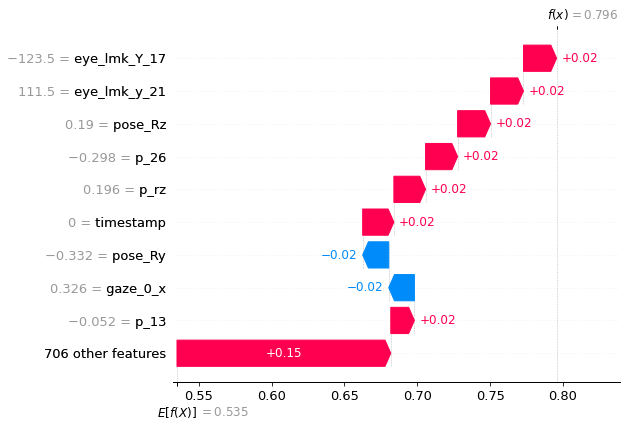

In [83]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [74]:
model.score(X_test,y_test)

-0.38582203997723896

In [84]:
y_pred= model.predict(X_test)

In [85]:
y_pred= (y_pred>0.5).astype(int)

In [78]:
from sklearn.metrics import classification_report, accuracy_score

In [86]:
print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score: 0.53
              precision    recall  f1-score   support

           0       0.47      0.68      0.56     32594
           1       0.63      0.42      0.50     42323

    accuracy                           0.53     74917
   macro avg       0.55      0.55      0.53     74917
weighted avg       0.56      0.53      0.53     74917



In [27]:
new_df.shape,df.shape

((862394, 816), (892090, 716))

In [41]:
a =list((range(713,720)))

In [45]:
a.extend(list((range(721,812))))

In [127]:
from sklearn.preprocessing import StandardScaler

# # scaling the data
scale = StandardScaler().fit(X_train)
X_train2 = scale.transform(X_train)
X_test2 = scale.transform(X_test)

In [128]:
model = xgboost.XGBRegressor().fit(X_train2, y_train)


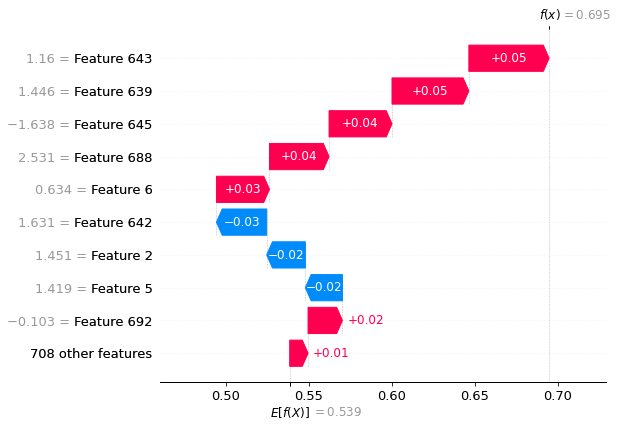

In [129]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train2)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [130]:
y_pred= model.predict(X_test)
y_pred= (y_pred>0.5).astype(int)


In [131]:
print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score: 0.46
              precision    recall  f1-score   support

         0.0       0.45      0.84      0.59     41673
         1.0       0.47      0.12      0.20     47832

    accuracy                           0.46     89505
   macro avg       0.46      0.48      0.39     89505
weighted avg       0.46      0.46      0.38     89505



In [50]:
new_df.drop(new_df.columns[a],inplace=True,axis=1)

In [52]:
new_df.to_csv('video_features_only_y.csv',index=False)

In [53]:
new_df.to_hdf('data.h5', 'data')

In [61]:
del(a)

In [62]:
df = pd.read_hdf('data.h5')

## Personality included

In [157]:
new_df = pd.read_hdf('data.h5')

In [159]:
new_df.y.isna().sum()

0

In [156]:
new_df.y.isna().sum()

3

In [160]:
df3 = pd.read_csv('C:/Users/asim.tewari/Downloads/personality_y.csv')

In [177]:
new_df  = pd.merge(df,df3,how='left',left_on='person_id',right_on='person_id')
print(df.shape,new_df.shape)
# new_df =  new_df[new_df.columns[list(range(720))]]

(862394, 718) (862394, 915)


In [258]:
new_df.to_hdf('data_with_gender.h5','data')

In [257]:
# import random
# random.seed(0)
# samples= list(new_df.person_id.unique())
# num_samples = len(samples)
# train_ids = random.sample(samples,round(0.9*num_samples))
# test_ids = list(set(samples)-set(train_ids))

# df_train=pd.DataFrame()
# for i in train_ids:
#   df_train=df_train.append(new_df[new_df['person_id']==i])

# df_test=pd.DataFrame()
# for i in test_ids:
#   df_test=df_test.append(new_df[new_df['person_id']==i])

# X_train = df_train.drop('y',axis=1)
# X_test = df_test.drop('y',axis=1)
# y_train = df_train['y']
# y_test = df_test['y']

MemoryError: Unable to allocate 308. MiB for an array with shape (693, 116326) and data type float32

In [184]:
df.shape,X_train.shape

((862394, 718), (787477, 914))

In [194]:
X_train.columns[[718]]

Index(['Gender_Male'], dtype='object')

In [197]:
X_train.drop(X_train.columns[list(range(719,914))],inplace=True,axis=1)
X_test.drop(X_test.columns[list(range(719,914))],inplace=True,axis=1)

In [198]:
X_test.shape

(74917, 719)

## LightGBM

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier
from category_encoders import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from warnings import filterwarnings
from sklearn.impute import SimpleImputer
filterwarnings('ignore')
import os
# print(os.listdir("../input"))

In [ ]:
# # target_column = "y"
# id_column = "person_id"
# categorical_cols = [c for c in test.columns if test[c].dtype in [np.object]]
# numerical_cols = [c for c in test.columns if test[c].dtype in [np.float, np.int] and c not in [target_column, id_column]]
# print("Number of features", len(categorical_cols)+len(numerical_cols))

In [201]:
X_train.columns

Index(['timestamp', 'confidence', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
       'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y',
       ...
       'AU28_c', 'AU45_c', 'question', 'person_id', 'WC', 'OtherP',
       'positive_assumption', 'negative_assumption',
       'What is your age (in years) ?', 'Gender_Male'],
      dtype='object', length=719)

In [200]:
X_train.columns[list(range(len(X_train.columns)-4))]

Index(['timestamp', 'confidence', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
       'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y',
       ...
       'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'question',
       'person_id', 'WC', 'OtherP'],
      dtype='object', length=715)

In [202]:
classifier = make_pipeline(
    ColumnTransformer([
        ('num', StandardScaler(), X_train.columns[list(range(len(X_train.columns)-4))]),
        ('cat', OneHotEncoder(), X_train.columns[[-1,-3,-4]]),    
    ]),
    LGBMClassifier(n_jobs=-1)
)

In [213]:
scale = StandardScaler()
scale.fit(X_train[X_train.columns[list(range(len(X_train.columns)-4))]])

StandardScaler()

In [214]:
X_train2 = scale.transform(X_train[X_train.columns[list(range(len(X_train.columns)-4))]])
X_test2 = scale.transform(X_test[X_test.columns[list(range(len(X_test.columns)-4))]])

In [237]:
X_test=np.append(X_test2,X_test[X_test.columns[[-4,-3,-1]]],axis=1)
X_train=np.append(X_train2,X_train[X_train.columns[[-4,-3,-1]]],axis=1)

In [241]:
classifier2= LGBMClassifier(n_jobs=-1)

In [242]:
oof_pred = cross_val_predict(classifier2, 
                             X_train, 
                             y_train, 
                             cv=5,
                             method="predict_proba")

In [243]:
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, oof_pred[:,1])))

Cross validation AUC 0.9873


In [244]:
classifier2.fit(X_train, y_train)
test_preds = classifier2.predict_proba(X_test)[:,1]

In [245]:
from sklearn.metrics import classification_report

In [246]:
y_pred=(test_preds>0.5).astype(int)

In [247]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32213
           1       1.00      0.99      0.99     42704

    accuracy                           0.99     74917
   macro avg       0.99      0.99      0.99     74917
weighted avg       0.99      0.99      0.99     74917



In [264]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(classifier2)
shap_values = explainer(X_train)

# visualize the first prediction's explanation


MemoryError: Unable to allocate 4.22 GiB for an array with shape (566195963,) and data type float64

In [262]:
shap_values[0]

.values =
array([[ 0.        ,  0.        ],
       [ 0.00013662, -0.00013662],
       [ 0.00072451, -0.00072451],
       ...,
       [-0.04929647,  0.04929647],
       [-0.05735919,  0.05735919],
       [-0.08388473,  0.08388473]])

.base_values =
array([-0.6745593,  0.6745593])

.data =
array([-1.15721929,  0.38481572,  1.61879098,  0.93236715,  0.04781633,
        1.58730936,  0.64316577, -0.27267027,  1.60567868,  0.75564915,
        0.50891525,  0.51492226,  0.50941843,  0.4996464 ,  0.48680535,
        0.4786036 ,  0.48628026,  0.49870253,  0.49466634,  0.51009881,
        0.51490945,  0.51550645,  0.50089735,  0.481785  ,  0.46341196,
        0.47474062,  0.48762462,  0.49693012,  0.49969971,  0.49869576,
        0.49437618,  0.4896169 ,  0.48703954,  0.49049968,  0.49399552,
        0.49876222,  0.50133735,  0.50056267,  0.37625173,  0.3749845 ,
        0.36141127,  0.34267652,  0.327494  ,  0.32868546,  0.34236145,
        0.36111549,  0.38140869,  0.37895566,  0.37519854,  0.

In [260]:
shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).